In [2]:
import pandas as pd

boston_df = pd.read_csv('../datasets/Boston.csv', index_col=0)
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 속성별 설명
- CRIM : 지역별 범죄 발생률
- ZN: 25,000 평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치할 시 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

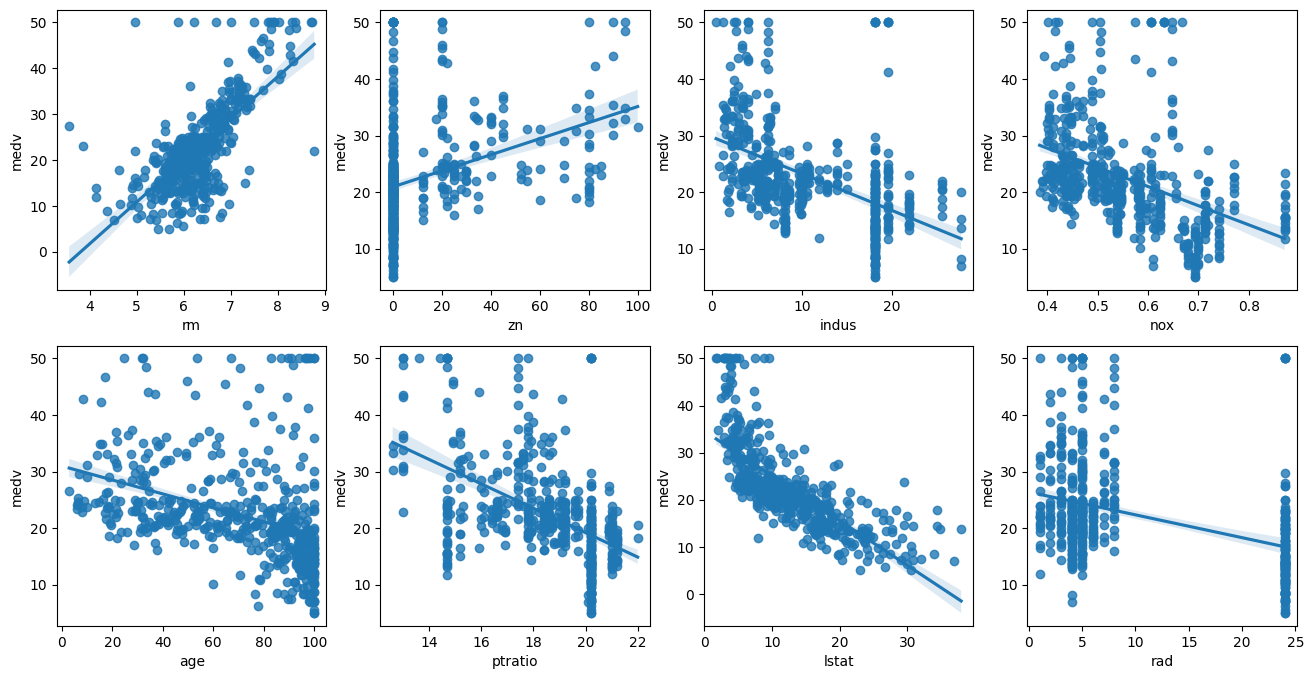

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2개의 행과 4개의 열을 가진 subplots를 이용, axsㄴ는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['rm', 'zn', 'indus', 'nox', 'age', 'ptratio', 'lstat', 'rad']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함꼐 표현
    sns.regplot(x=feature, y='medv', data=boston_df, ax=axs[row][col])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_target = boston_df['medv']
X_data = boston_df.drop(['medv'], axis =1, inplace =False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state =156)

#Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [7]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164414
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

rm          3.4
chas        3.0
rad         0.4
zn          0.1
indus       0.0
age         0.0
tax        -0.0
black       0.0
crim       -0.1
lstat      -0.6
ptratio    -0.9
dis        -1.7
nox       -19.8
dtype: float64

In [9]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['medv']
X_data = boston_df.drop(['medv'], axis = 1, inplace = False)
lr = LinearRegression()

#cross_val_score()로 5Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data , y_target,
                                scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_target = boston_df['medv']
X_data = boston_df.drop(['medv'], axis=1)

# Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Random Forest 모델 학습/예측/평가
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_preds_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_preds_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_preds_rf)

print('Random Forest')
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse_rf, rmse_rf))
print('Variance score: {0:.3f}'.format(r2_rf))

Random Forest
MSE: 7.318, RMSE: 2.705
Variance score: 0.897


## XGBRegressor

In [19]:
# XGBoost 모델 학습/예측/평가
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
y_preds_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_preds_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_preds_xgb)

print('XGBoost')
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse_xgb, rmse_xgb))
print('Variance score: {0:.3f}'.format(r2_xgb))

XGBoost
MSE: 6.908, RMSE: 2.628
Variance score: 0.903


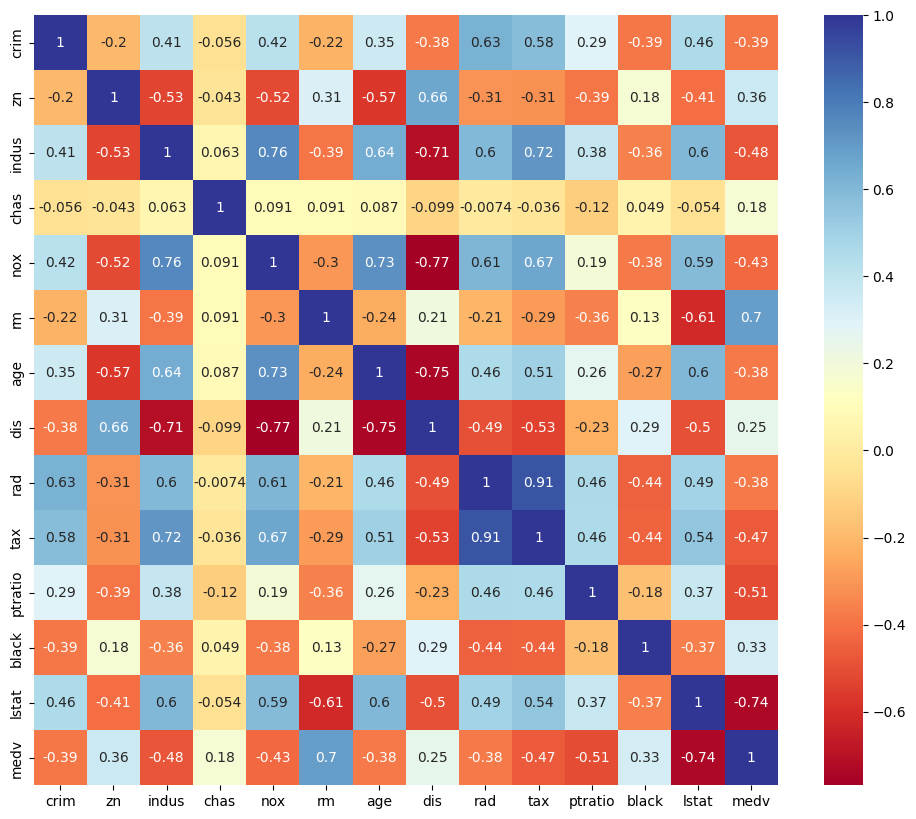

In [10]:
boston_df.corr()
plt.figure(figsize=(12, 10))
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

## 스케일링

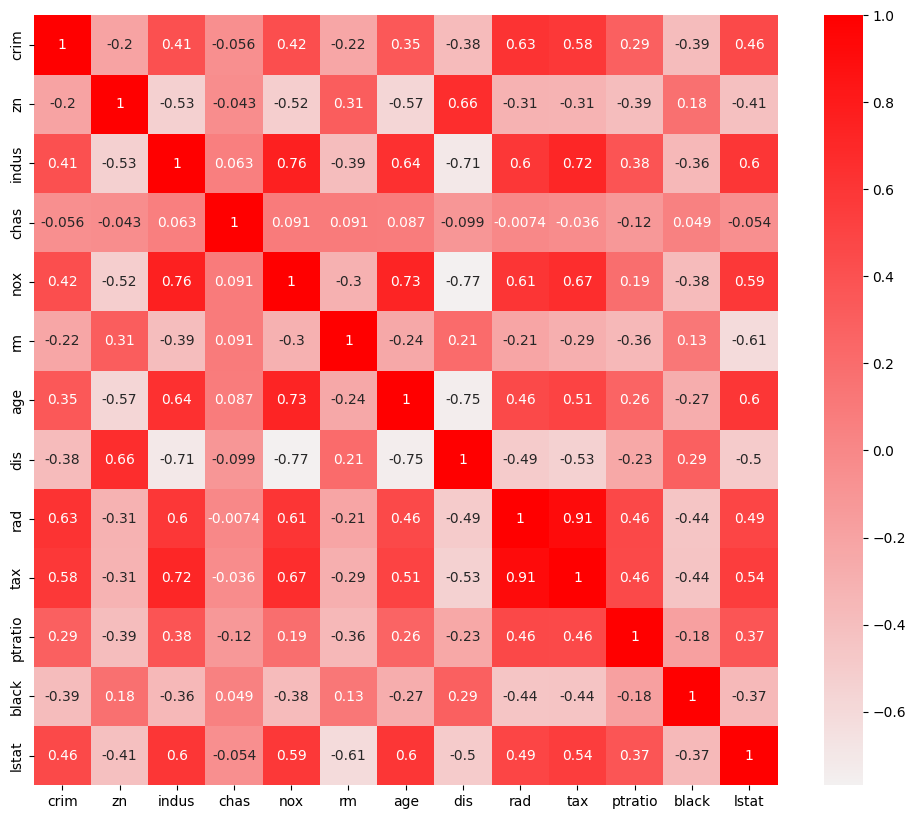

In [20]:
from sklearn.preprocessing import StandardScaler

y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

scaler=StandardScaler()
scaler.fit(X_data)
X_data_scaler= scaler.transform(X_data)                                   ## X_data standardScaling

boston_df_scaler=pd.DataFrame(data=X_data_scaler, columns=X_data.columns)
plt.figure(figsize=(12, 10))                                              ## boston_df_scaler이라는 새로운 데이터 프레임
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_scaler.corr(), annot=True, cmap=cmap)
plt.show()

## Linear Regression

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_data_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.297, RMSE:4.159
Variance score:0.757


In [22]:
boston_df_scaler.drop(['tax','dis'],axis=1,inplace=True)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(boston_df_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.687, RMSE:4.206
Variance score:0.752


## RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_preds2=rf_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds2)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds2):.3f}")

MSE : 8.526, RMSE:2.920
Variance score:0.880


## GradientBoostingRegressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf= GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train,y_train)
y_preds3 = gb_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds3)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds3):.3f}")

MSE : 7.934, RMSE:2.817
Variance score:0.889


## XGBRegressor

In [27]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
pred_probs = model.predict(X_test)

mse= mean_squared_error(y_test,pred_probs)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,pred_probs):.3f}")

MSE : 7.509, RMSE:2.740
Variance score:0.895
